In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#read the csv file
# https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling
df = pd.read_csv('Churn_Modelling.csv')
#check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [3]:
#remove the rows that are not needed
df.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


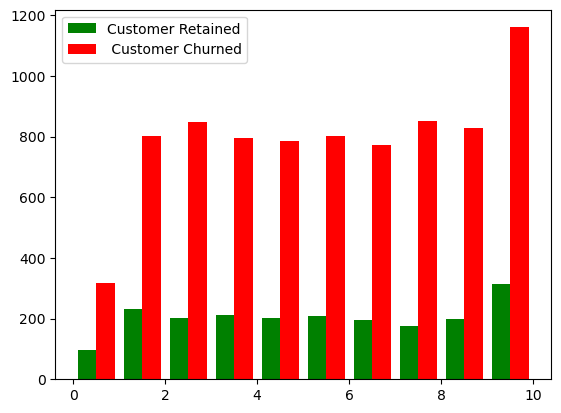

In [4]:
#lets plot a histogram to see which customers have or have not churned/exited according to tenure
#According to the dataset. if Exited == 1 that means customer has churned and vice versa
tenure_churned_no = df[df.Exited==0].Tenure
tenure_churned_yes = df[df.Exited==1].Tenure
plt.hist([tenure_churned_yes, tenure_churned_no], color = ['green','red'], label = ['Customer Retained', ' Customer Churned'])
plt.legend()

In [5]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
#shows the unique values of every column, from this we can see what needs to be adjusted and scaled
for column in df:
    print(f'{column} : {df[column].unique()}')

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [7]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
#change all values with 2 options to 0 and 1
df['Gender'].replace({'Female':0,'Male':1},inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [9]:
#one hot encode remaining string values, in this case the Geography and NumOfProducts columns
df = pd.get_dummies(data=df,columns=['Geography','NumOfProducts'])

In [10]:
#Now we need to scale the rest of the numbers to between 0 and 1 for the machine learning algorithm
colsToScale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[colsToScale]=scaler.fit_transform(df[colsToScale])
for column in df:
    print(f'{column} : {df[column].unique()}')
df

CreditScore : [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,0.538,0,0.324324,0.2,0.000000,1,1,0.506735,1,1,0,0,1,0,0,0
1,0.516,0,0.310811,0.1,0.334031,0,1,0.562709,0,0,0,1,1,0,0,0
2,0.304,0,0.324324,0.8,0.636357,1,0,0.569654,1,1,0,0,0,0,1,0
3,0.698,0,0.283784,0.1,0.000000,0,0,0.469120,0,1,0,0,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,1,1,0.395400,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,1,0,0.481341,0,1,0,0,0,1,0,0
9996,0.332,1,0.229730,1.0,0.228657,1,1,0.508490,0,1,0,0,1,0,0,0
9997,0.718,0,0.243243,0.7,0.000000,0,1,0.210390,1,1,0,0,1,0,0,0
9998,0.844,1,0.324324,0.3,0.299226,1,0,0.464429,1,0,1,0,0,1,0,0


In [11]:
#now the values are all between 1 and 0 so we can now start the machine learning
#lets split up the dataset into a training and testing dataset
X = df.drop('Exited',axis = 1)
X

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,0.538,0,0.324324,0.2,0.000000,1,1,0.506735,1,0,0,1,0,0,0
1,0.516,0,0.310811,0.1,0.334031,0,1,0.562709,0,0,1,1,0,0,0
2,0.304,0,0.324324,0.8,0.636357,1,0,0.569654,1,0,0,0,0,1,0
3,0.698,0,0.283784,0.1,0.000000,0,0,0.469120,1,0,0,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,1,1,0.395400,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,1,0,0.481341,1,0,0,0,1,0,0
9996,0.332,1,0.229730,1.0,0.228657,1,1,0.508490,1,0,0,1,0,0,0
9997,0.718,0,0.243243,0.7,0.000000,0,1,0.210390,1,0,0,1,0,0,0
9998,0.844,1,0.324324,0.3,0.299226,1,0,0.464429,0,1,0,0,1,0,0


In [12]:
y= df['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
X_train.shape

(8000, 15)

In [14]:
X_test.shape

(2000, 15)

In [15]:
y_train.shape

(8000,)

In [16]:
y_test.shape

(2000,)

In [17]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [31]:
#Use a neural network to predict whether a customer will churn or not
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential()
model.add(tf.keras.layers.Dense(15, input_shape=(None, 32, 15), activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
250/250 [==============================] - 1s 1ms/step - loss: 0.5003 - accuracy: 0.7759
Epoch 2/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.4206 - accuracy: 0.8124
Epoch 3/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8280
Epoch 4/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3837 - accuracy: 0.8371
Epoch 5/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3750 - accuracy: 0.8396
Epoch 6/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3707 - accuracy: 0.8440
Epoch 7/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3676 - accuracy: 0.8457
Epoch 8/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3653 - accuracy: 0.8461
Epoch 9/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3650 - accuracy: 0.8506
Epoch 10/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.363

250/250 [==============================] - 0s 1ms/step - loss: 0.3346 - accuracy: 0.8610
Epoch 75/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3336 - accuracy: 0.8620
Epoch 76/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8604
Epoch 77/1000
250/250 [==============================] - 0s 977us/step - loss: 0.3345 - accuracy: 0.8618
Epoch 78/1000
250/250 [==============================] - 0s 984us/step - loss: 0.3334 - accuracy: 0.8600
Epoch 79/1000
250/250 [==============================] - 0s 967us/step - loss: 0.3345 - accuracy: 0.8612
Epoch 80/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3340 - accuracy: 0.8618
Epoch 81/1000
250/250 [==============================] - 0s 958us/step - loss: 0.3334 - accuracy: 0.8616
Epoch 82/1000
250/250 [==============================] - 0s 980us/step - loss: 0.3326 - accuracy: 0.8622
Epoch 83/1000
250/250 [==============================] - 0s 1ms/step - loss: 

250/250 [==============================] - 0s 1ms/step - loss: 0.3239 - accuracy: 0.8656
Epoch 153/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3234 - accuracy: 0.8662
Epoch 154/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3245 - accuracy: 0.8645
Epoch 155/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3235 - accuracy: 0.8670
Epoch 156/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3232 - accuracy: 0.8661
Epoch 157/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3237 - accuracy: 0.8660
Epoch 158/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3234 - accuracy: 0.8686
Epoch 159/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3242 - accuracy: 0.8654
Epoch 160/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3235 - accuracy: 0.8655
Epoch 161/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 1ms/step - loss: 0.3187 - accuracy: 0.8670
Epoch 231/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3183 - accuracy: 0.8683
Epoch 232/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3175 - accuracy: 0.8668
Epoch 233/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3183 - accuracy: 0.8680
Epoch 234/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3188 - accuracy: 0.8673
Epoch 235/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3176 - accuracy: 0.8668
Epoch 236/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3177 - accuracy: 0.8685
Epoch 237/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8684
Epoch 238/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3178 - accuracy: 0.8683
Epoch 239/1000
250/250 [==============================] - 0s 1ms/step - loss: 0

250/250 [==============================] - 0s 987us/step - loss: 0.3157 - accuracy: 0.8698
Epoch 309/1000
250/250 [==============================] - 0s 979us/step - loss: 0.3138 - accuracy: 0.8685
Epoch 310/1000
250/250 [==============================] - 0s 1000us/step - loss: 0.3150 - accuracy: 0.8701
Epoch 311/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3153 - accuracy: 0.8695
Epoch 312/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3144 - accuracy: 0.8701
Epoch 313/1000
250/250 [==============================] - 0s 978us/step - loss: 0.3147 - accuracy: 0.8684
Epoch 314/1000
250/250 [==============================] - 0s 976us/step - loss: 0.3143 - accuracy: 0.8690
Epoch 315/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3153 - accuracy: 0.8702
Epoch 316/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3140 - accuracy: 0.8676
Epoch 317/1000
250/250 [==============================] - 0s 1ms/ste

250/250 [==============================] - 0s 1ms/step - loss: 0.3112 - accuracy: 0.8710
Epoch 387/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3105 - accuracy: 0.8730
Epoch 388/1000
250/250 [==============================] - 0s 988us/step - loss: 0.3111 - accuracy: 0.8737
Epoch 389/1000
250/250 [==============================] - 0s 984us/step - loss: 0.3108 - accuracy: 0.8711
Epoch 390/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3096 - accuracy: 0.8721
Epoch 391/1000
250/250 [==============================] - 0s 984us/step - loss: 0.3110 - accuracy: 0.8724
Epoch 392/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3108 - accuracy: 0.8725
Epoch 393/1000
250/250 [==============================] - 0s 996us/step - loss: 0.3113 - accuracy: 0.8721
Epoch 394/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3104 - accuracy: 0.8717
Epoch 395/1000
250/250 [==============================] - 0s 992us/step

Epoch 464/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3099 - accuracy: 0.8724
Epoch 465/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3083 - accuracy: 0.8721
Epoch 466/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3086 - accuracy: 0.8740
Epoch 467/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3091 - accuracy: 0.8721
Epoch 468/1000
250/250 [==============================] - 0s 968us/step - loss: 0.3083 - accuracy: 0.8717
Epoch 469/1000
250/250 [==============================] - 0s 992us/step - loss: 0.3088 - accuracy: 0.8723
Epoch 470/1000
250/250 [==============================] - 0s 981us/step - loss: 0.3077 - accuracy: 0.8758
Epoch 471/1000
250/250 [==============================] - 0s 952us/step - loss: 0.3075 - accuracy: 0.8736
Epoch 472/1000
250/250 [==============================] - 0s 972us/step - loss: 0.3078 - accuracy: 0.8739
Epoch 473/1000
250/250 [==============================

250/250 [==============================] - 0s 974us/step - loss: 0.3063 - accuracy: 0.8748
Epoch 542/1000
250/250 [==============================] - 0s 952us/step - loss: 0.3055 - accuracy: 0.8735
Epoch 543/1000
250/250 [==============================] - 0s 976us/step - loss: 0.3065 - accuracy: 0.8746
Epoch 544/1000
250/250 [==============================] - 0s 980us/step - loss: 0.3071 - accuracy: 0.8735
Epoch 545/1000
250/250 [==============================] - 0s 982us/step - loss: 0.3061 - accuracy: 0.8756
Epoch 546/1000
250/250 [==============================] - 0s 949us/step - loss: 0.3057 - accuracy: 0.8740
Epoch 547/1000
250/250 [==============================] - 0s 956us/step - loss: 0.3070 - accuracy: 0.8744
Epoch 548/1000
250/250 [==============================] - 0s 968us/step - loss: 0.3061 - accuracy: 0.8744
Epoch 549/1000
250/250 [==============================] - 0s 964us/step - loss: 0.3064 - accuracy: 0.8737
Epoch 550/1000
250/250 [==============================] - 0s 

250/250 [==============================] - 0s 957us/step - loss: 0.3046 - accuracy: 0.8754
Epoch 619/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3048 - accuracy: 0.8745
Epoch 620/1000
250/250 [==============================] - 0s 980us/step - loss: 0.3056 - accuracy: 0.8755
Epoch 621/1000
250/250 [==============================] - 0s 984us/step - loss: 0.3053 - accuracy: 0.8755
Epoch 622/1000
250/250 [==============================] - 0s 956us/step - loss: 0.3049 - accuracy: 0.8735
Epoch 623/1000
250/250 [==============================] - 0s 976us/step - loss: 0.3053 - accuracy: 0.8761
Epoch 624/1000
250/250 [==============================] - 0s 972us/step - loss: 0.3044 - accuracy: 0.8749
Epoch 625/1000
250/250 [==============================] - 0s 988us/step - loss: 0.3043 - accuracy: 0.8748
Epoch 626/1000
250/250 [==============================] - 0s 956us/step - loss: 0.3041 - accuracy: 0.8741
Epoch 627/1000
250/250 [==============================] - 0s 96

250/250 [==============================] - 0s 968us/step - loss: 0.3039 - accuracy: 0.8752
Epoch 696/1000
250/250 [==============================] - 0s 964us/step - loss: 0.3038 - accuracy: 0.8764
Epoch 697/1000
250/250 [==============================] - 0s 960us/step - loss: 0.3038 - accuracy: 0.8748
Epoch 698/1000
250/250 [==============================] - 0s 962us/step - loss: 0.3024 - accuracy: 0.8740
Epoch 699/1000
250/250 [==============================] - 0s 957us/step - loss: 0.3042 - accuracy: 0.8758
Epoch 700/1000
250/250 [==============================] - 0s 972us/step - loss: 0.3035 - accuracy: 0.8739
Epoch 701/1000
250/250 [==============================] - 0s 952us/step - loss: 0.3038 - accuracy: 0.8744
Epoch 702/1000
250/250 [==============================] - 0s 960us/step - loss: 0.3033 - accuracy: 0.8765
Epoch 703/1000
250/250 [==============================] - 0s 980us/step - loss: 0.3022 - accuracy: 0.8760
Epoch 704/1000
250/250 [==============================] - 0s 

250/250 [==============================] - 0s 972us/step - loss: 0.3029 - accuracy: 0.8746
Epoch 773/1000
250/250 [==============================] - 0s 956us/step - loss: 0.3024 - accuracy: 0.8771
Epoch 774/1000
250/250 [==============================] - 0s 980us/step - loss: 0.3024 - accuracy: 0.8754
Epoch 775/1000
250/250 [==============================] - 0s 972us/step - loss: 0.3015 - accuracy: 0.8773
Epoch 776/1000
250/250 [==============================] - 0s 980us/step - loss: 0.3020 - accuracy: 0.8760
Epoch 777/1000
250/250 [==============================] - 0s 952us/step - loss: 0.3021 - accuracy: 0.8735
Epoch 778/1000
250/250 [==============================] - 0s 968us/step - loss: 0.3010 - accuracy: 0.8777
Epoch 779/1000
250/250 [==============================] - 0s 968us/step - loss: 0.3028 - accuracy: 0.8763
Epoch 780/1000
250/250 [==============================] - 0s 968us/step - loss: 0.3024 - accuracy: 0.8761
Epoch 781/1000
250/250 [==============================] - 0s 

250/250 [==============================] - 0s 960us/step - loss: 0.3008 - accuracy: 0.8761
Epoch 850/1000
250/250 [==============================] - 0s 976us/step - loss: 0.3013 - accuracy: 0.8765
Epoch 851/1000
250/250 [==============================] - 0s 948us/step - loss: 0.3009 - accuracy: 0.8766
Epoch 852/1000
250/250 [==============================] - 0s 972us/step - loss: 0.3006 - accuracy: 0.8781
Epoch 853/1000
250/250 [==============================] - 0s 968us/step - loss: 0.3002 - accuracy: 0.8781
Epoch 854/1000
250/250 [==============================] - 0s 976us/step - loss: 0.3006 - accuracy: 0.8776
Epoch 855/1000
250/250 [==============================] - 0s 980us/step - loss: 0.3019 - accuracy: 0.8752
Epoch 856/1000
250/250 [==============================] - 0s 964us/step - loss: 0.3001 - accuracy: 0.8789
Epoch 857/1000
250/250 [==============================] - 0s 980us/step - loss: 0.3008 - accuracy: 0.8737
Epoch 858/1000
250/250 [==============================] - 0s 

250/250 [==============================] - 0s 1000us/step - loss: 0.2996 - accuracy: 0.8754
Epoch 927/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.2996 - accuracy: 0.8759
Epoch 928/1000
250/250 [==============================] - 0s 965us/step - loss: 0.2992 - accuracy: 0.8773
Epoch 929/1000
250/250 [==============================] - 0s 998us/step - loss: 0.2989 - accuracy: 0.8788
Epoch 930/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.3000 - accuracy: 0.8774
Epoch 931/1000
250/250 [==============================] - 0s 960us/step - loss: 0.2997 - accuracy: 0.8776
Epoch 932/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.2995 - accuracy: 0.8791
Epoch 933/1000
250/250 [==============================] - 0s 1ms/step - loss: 0.2990 - accuracy: 0.8790
Epoch 934/1000
250/250 [==============================] - 0s 968us/step - loss: 0.2997 - accuracy: 0.8763
Epoch 935/1000
250/250 [==============================] - 0s 1000us/

In [33]:
#this is what the model predicts based off the test partition the percentage that the customer churns
yprediction = model.predict(X_test)
yprediction[:10]

63/63 [==============================] - 0s 774us/step


array([[0.04266636],
       [0.12028359],
       [0.09449218],
       [0.04952187],
       [0.05991808],
       [0.13988547],
       [0.00951752],
       [0.46041876],
       [0.01550599],
       [0.99512535]], dtype=float32)

In [36]:
#we make it so that if the value is more than 0.5 then it will give 1 or 0 which represents yes or no respectively
yp=[]
for i in yprediction:
    if i > 0.5:
        yp.append(1)
    else:
        yp.append(0)

In [43]:
yp[20:40]

[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [58]:
y_test[20:40]

5153    0
4921    1
7755    0
5492    0
2593    0
1745    0
7398    1
8046    0
3830    0
4871    0
2097    0
4872    0
5433    0
8711    0
1810    0
1091    0
7478    0
6990    0
2828    0
2200    0
Name: Exited, dtype: int64

Text(95.72222222222221, 0.5, 'Truth')

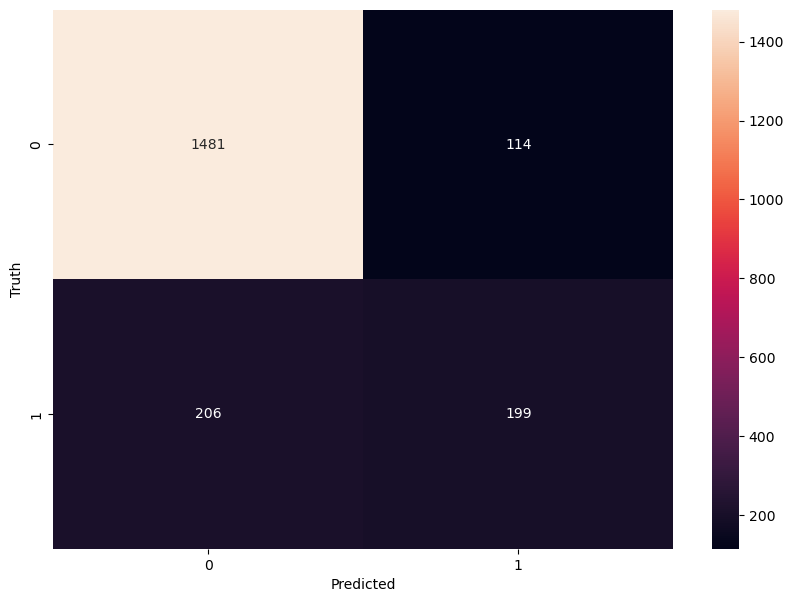

In [48]:
#here we plot a truth table to see how visualise the accuracy of the model
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=yp)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1595
           1       0.64      0.49      0.55       405

    accuracy                           0.84      2000
   macro avg       0.76      0.71      0.73      2000
weighted avg       0.83      0.84      0.83      2000

